## algorithm design and anlysis-2025 spring  homework 1 
**Deadline**：2025.5.14

**name**:


note：
---
1. 带有\*的题目，申请免上课的同学，必须完成，其他同学选作；
2. 请独立完成，如求助了他人或者大模型，请著明，并且不可省略算法分析部分；
4. 如若作答有雷同，全部取消成绩；
3. 需要书面作答的题目，可以通过引用图片的形式添加，但是注意上传项目时包含所引用的图片的源文件；
4. $log_n$ 默认表示$log_2{n}$;

## 问题 1

对于下面的每一对表达式(A, B), A是否能表示为B的 $\Theta, \Omega ,O$形式. 请注意, 这些关系中的零个、一个或多个可能成立。列出所有正确的。经常发生一些学生会,把指示写错, 所以请把关系写完整, 例如: $A = O(B),  A =\Theta(B)$, 或$A = \Omega(B)$。

1. $A=n^2-100n, B=n^2$
2. $A=logn, B=log_{1.2}n$
3. $A=3^{2n}, B=2^{4n}$
4. $A=2^{logn}, B=n$
5. $A=\log{\log}{n},B=10^{10^{100}}$

can refer a handwritten picture, pleas upload the picture in /fig/xxx.png
answer: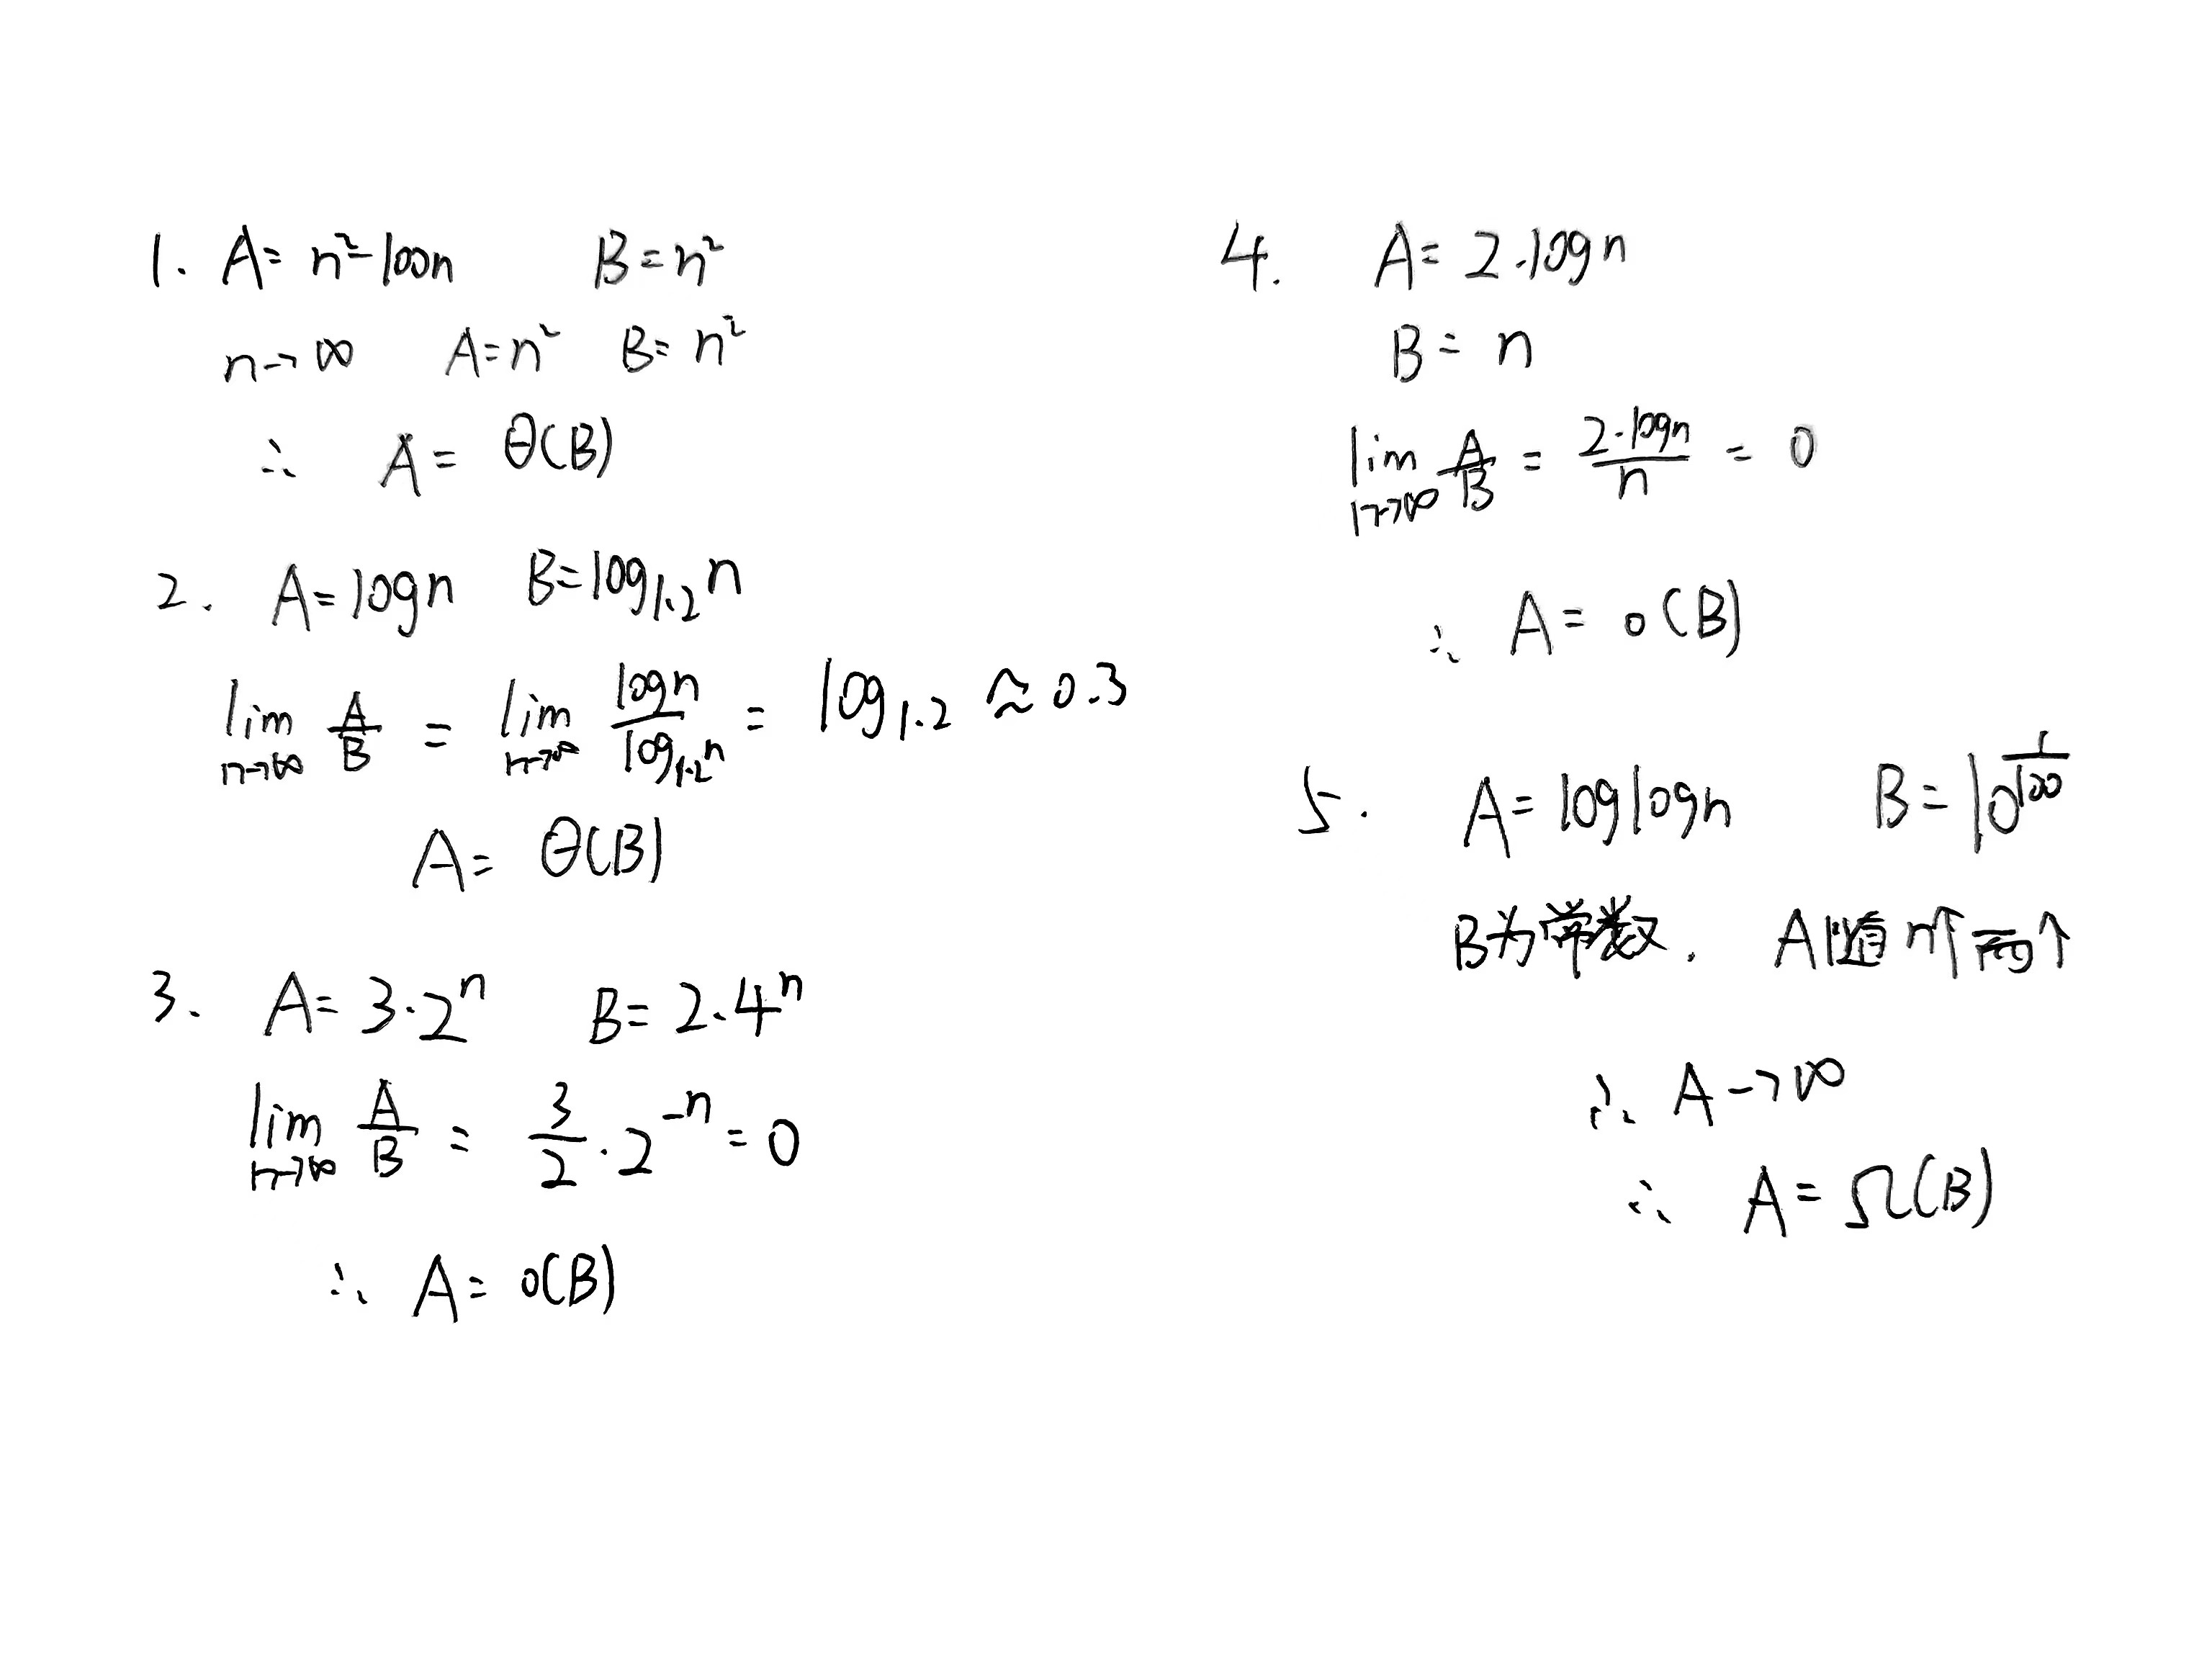


## 问题 2：

假设有函数 $f$ 和 $g$ 使得 $f(n)$ = $O(g(n))$ 对于下面的每一个陈述, 请判断对错, 如果正确请给出证明, 否则请给出一个反例。

1. $\log{f(n)}$ = $O(\log(1+g(n)))$
2. $3^{f(n)}=O(3^{g(n)})$
3. $(f(n))^2=O((g(n))^2)$ 

you can refer a handwritten picture, pleas upload the picture in /fig/xxx.png
answer: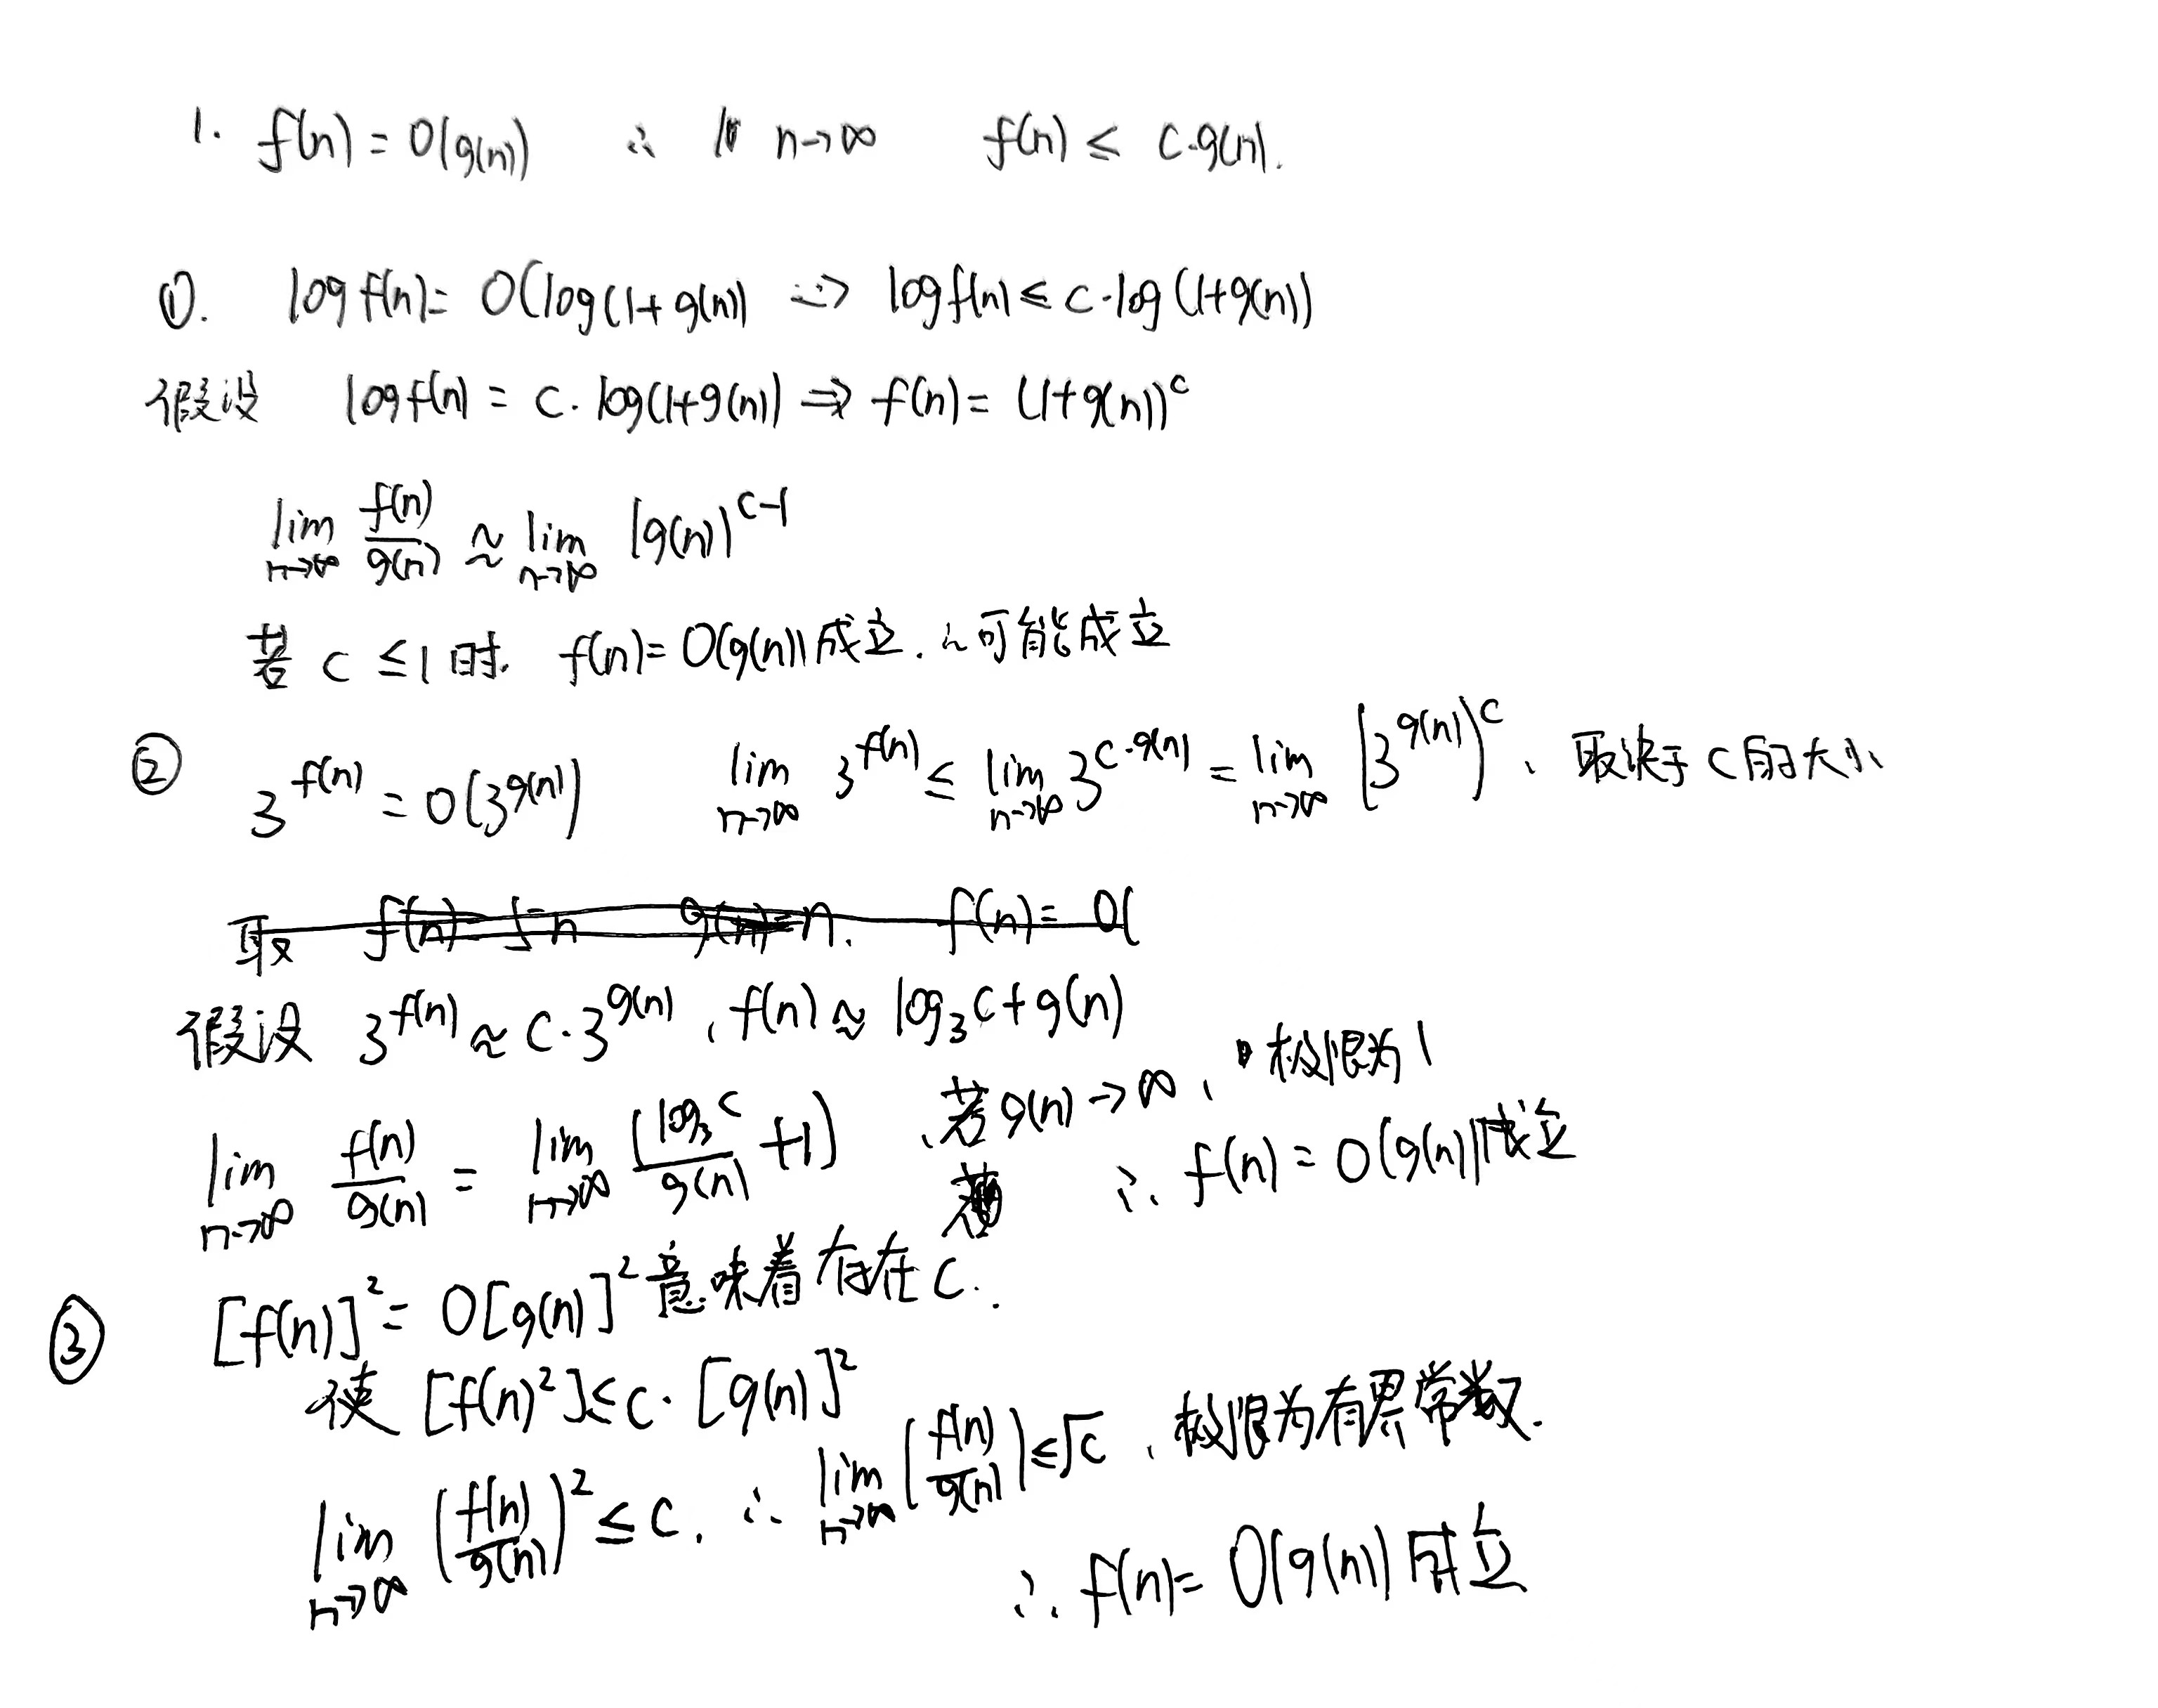

## 问题 3

根据下列递归公式, 计算下列 $T(n)$ 对应的的渐近上界。要求所求的边界尽可能的紧（tight）, 请写明步骤。

1. $T(1)=1; T(n)=T(n/4)+1$ for $n>1$
2. $T(1)=1;T(n)=3T(n/3)+n^2$ for $n>1$
3. $T(1)=1;T(n)=T(2n/3)+1$ for $n>1$
4. $T(1)=1;T(n)=5T(n/4)+n$ for $n>1$
5. $T(n)=1 \ for\ n \le 2 ; T(n)=T(\sqrt{n})+1 \ for \ n>2$

can refer a handwritten picture, pleas upload the picture in /fig/xxx.png
answer: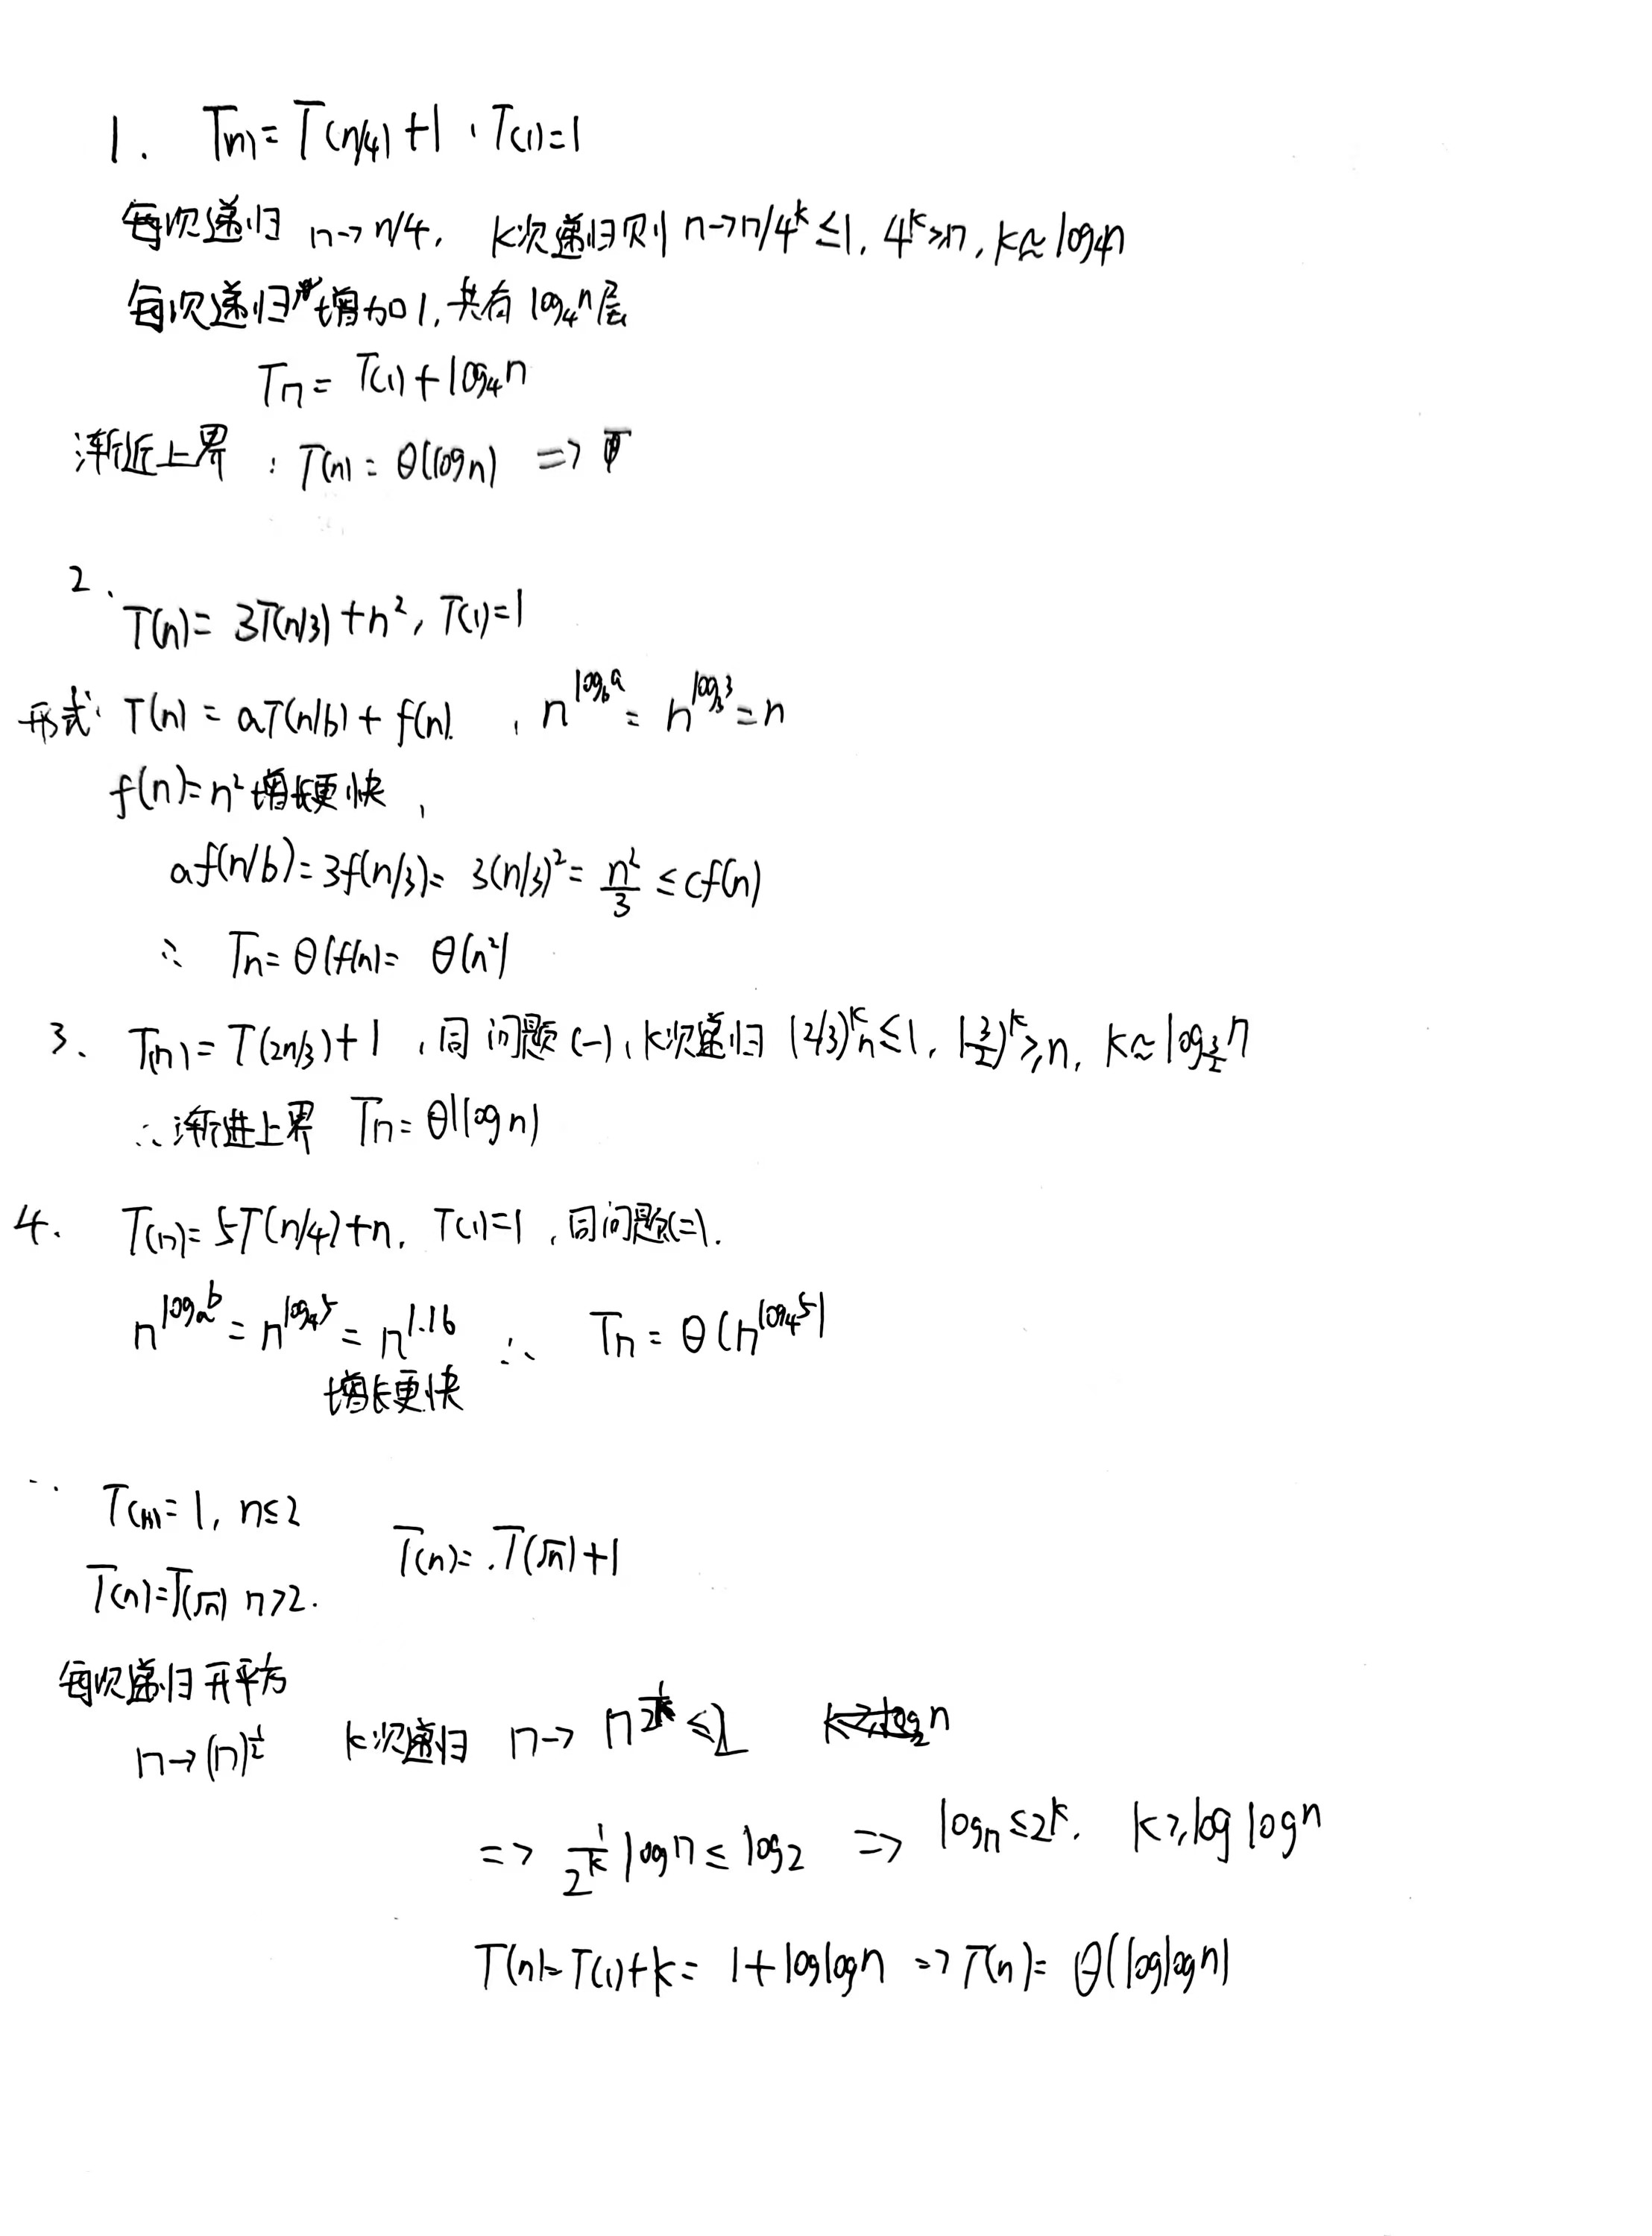

## 问题 4：

给定一个包含n个元素的数组 `profits` , 它的第 `i` 个元素 `profits[i]` 表示一支股票第 `i` 天的**收益**（正数表示涨, 负数表示跌）。你只能选择 **某一天** 买入这只股票, 并选择在 **未来的某一个不同的日子** 卖出该股票。

1. 设计一个算法来计算你所能获取的最大利润和对应买入和卖出的日期。请分析算法方案, 计算其时间复杂度, 并且使用python编程实现该算法。

2. \* 设计一个时间复杂度为 $O(n)$的算法实现该算法

e.g. :
---
profits=[3,2,1,-7,5,2,-1,3,-1], 第5天买入, 第8天卖出, 收益最大：9



idea:
解决此问题，最简单暴力的就是枚举法，但是时间复杂度可能过高，需要两个循环来进行，同时这个问题也可以看作一个经典的动态规划（DP）问题，类似于“0-1 背包问题”的变种。目标是给定一个数组 profits 和一个元素 i，计算从数组 profits[0] 到 profits[i] 的最大收益。

In [2]:
def max_profit_optimized(profits):
    n = len(profits)
    if n < 2:
        return -1, -1, -float('inf')  # 无法交易

    current_sum = 0  # 当前前缀和
    min_sum_so_far = 0  # 到目前为止的最小前缀和
    max_profit = -float('inf')  # 最大收益
    best_buy = -1  # 最佳买入天（1-based）
    best_sell = -1  # 最佳卖出天（1-based）
    buy_index = 0  # 记录最小前缀和对应的买入索引（0-based）

    for i in range(n):
        current_sum += profits[i]
        # 更新最小前缀和和对应的买入点
        if current_sum - min_sum_so_far > max_profit and i > buy_index:
            max_profit = current_sum - min_sum_so_far
            best_buy = buy_index + 1  # 转换为 1-based
            best_sell = i + 1  # 转换为 1-based
        # 如果当前前缀和更小，更新买入点
        if current_sum < min_sum_so_far:
            min_sum_so_far = current_sum
            buy_index = i + 1  # 下一天作为新的潜在买入点

    # 如果没有找到有效交易
    if max_profit <= 0:
        return -1, -1, -float('inf')

    return best_buy, best_sell, max_profit

# 测试
profits = [3, 2, 1, -7, 5, 2, -1, 3, -1]
buy, sell, max_profit = max_profit_optimized(profits)
print(f"Optimized method: 第{buy}天买入, 第{sell}天卖出, 收益最大：{max_profit}")

Optimized method: 第5天买入, 第8天卖出, 收益最大：9


In [ ]:
# an algorithm with O(n)

## 问题 5：

观察下方的分治算法（divide-and-conquer algorithm）的伪代码, 回答下面问题

```latex
DoSomething(A,p,r)
-----
n := r-p+1
if n=2 and A[p]>A[r] then
    swap A[p] and A[r]
else if n >= 3 then
    m = ceil(2n/3)
    DoSomething(A,p,p+m-1)
    DoSomething(A,r-m+1,r)
    DoSomething(A,p,p+m-1)  
    
---
first call: DoSomething(A,1,n)
```

note：$ceil(2n/3)=\left\lceil {2n/3} \right\rceil$；$:=$ 表示赋值, 等价于 $\to$；A是一个包含n的整数元素的数组, 

1. 写出该算法时间复杂度的递归公式, 并求解其对应的渐进表示
2. 描述一下该算法的功能, 并判断是否是最高效的解决方案
3. 使用python编程实现上述算法或其对应的更高效版本的算法


idea：
1. 每次递归将问题规模 n 分为两个子问题，每个子问题的规模为 m = ceil(2n/3)，这是一个分治形式的递归，类似于主定理的形式：T(n)=aT(n/b)+f(n)并且进行递归调用。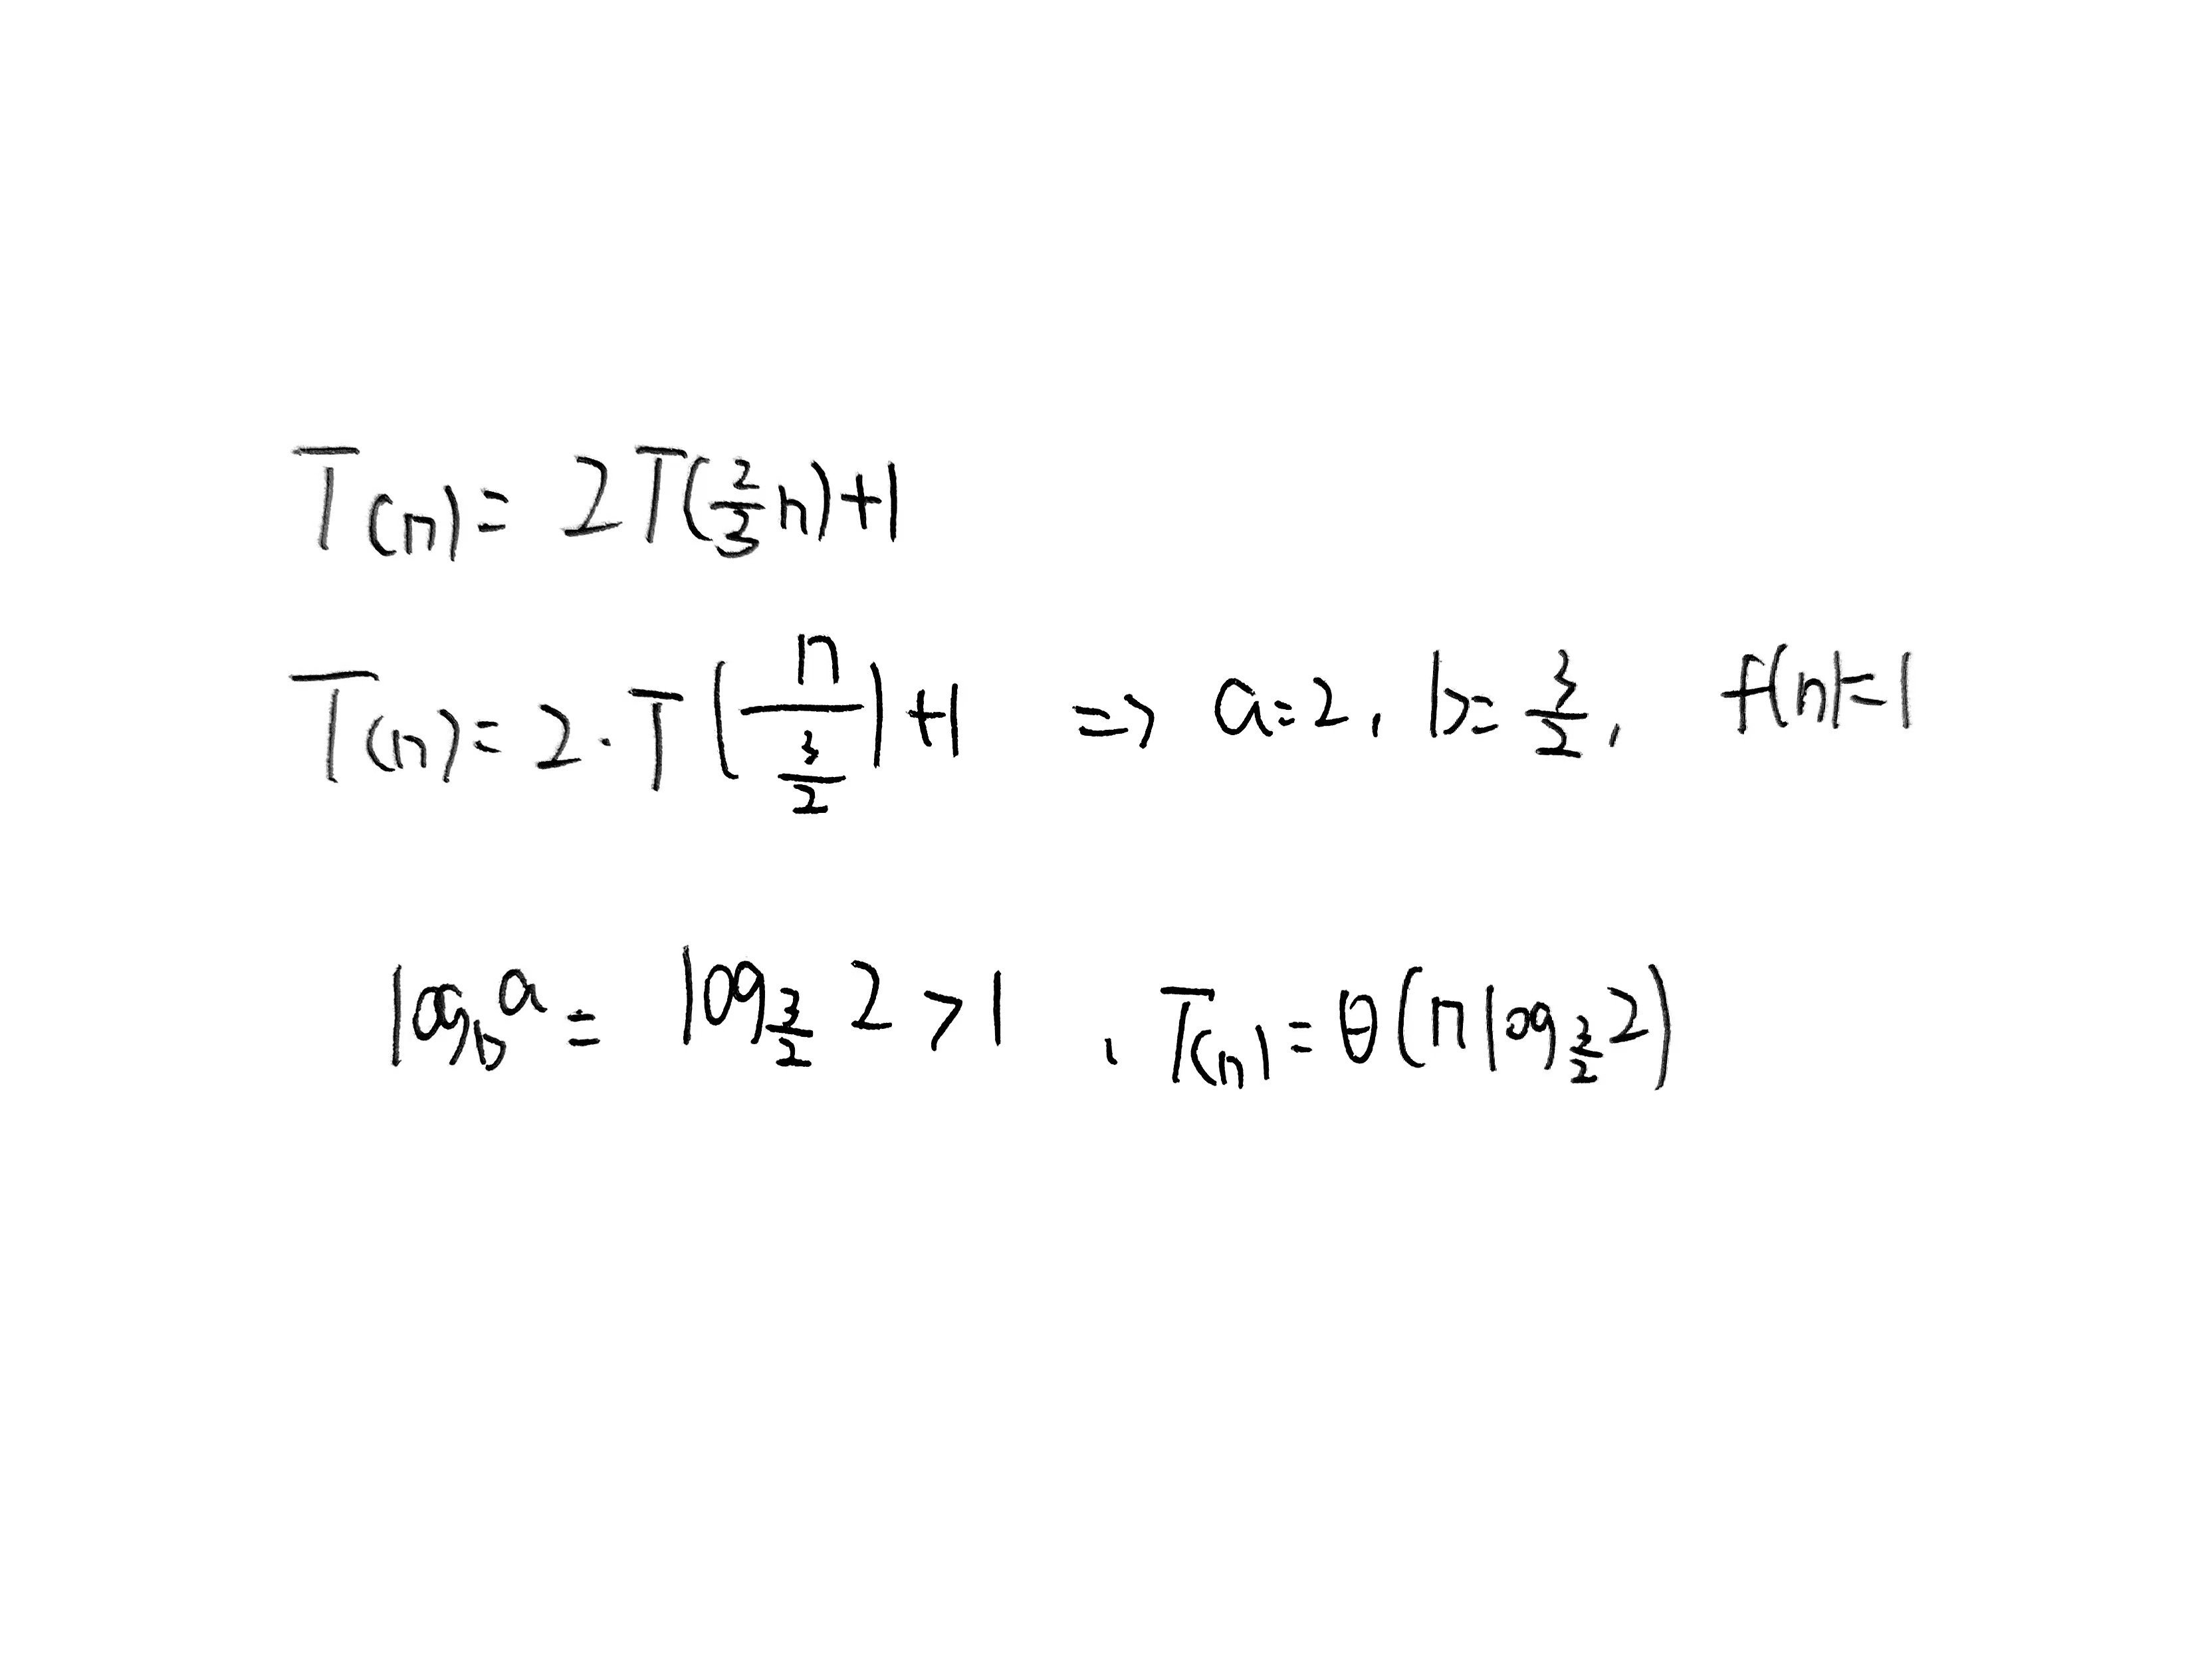


answer:
1. 这是一种排序算法。该算法 是一种基于分治策略的递归算法，其主要功能是对输入数组 A 的子数组进行局部排序或调整。由第一问得出的结论，应该不是最高效率的算法快速排序：平均时间复杂度 𝑂(𝑛log𝑛)，通过选择枢轴划分数组并递归排序，适用于全局排序。
2. 下面将实现快速排序的方法

In [3]:
def quicksort(arr, low, high):
    def partition(low, high):
        pivot = arr[high]  # 选择最后一个元素作为枢轴
        i = low - 1  # i 指向小于枢轴的区域的最后一个元素
        for j in range(low, high):
            if arr[j] <= pivot:
                i += 1  # 扩展小于枢轴的区域
                arr[i], arr[j] = arr[j], arr[i]  # 交换
        arr[i + 1], arr[high] = arr[high], arr[i + 1]  # 将枢轴放到正确位置
        return i + 1

    if low < high:
        # 划分，pi 是枢轴的最终位置
        pi = partition(low, high)
        # 递归排序左半部分
        quicksort(arr, low, pi - 1)
        # 递归排序右半部分
        quicksort(arr, pi + 1, high)
    return arr

def qsort(arr):
    # 包装函数，复制数组以避免修改原数组
    arr_copy = arr.copy()
    return quicksort(arr_copy, 0, len(arr_copy) - 1)

# 测试
A = [1, 4, 1, 4, 2, 1]
B = qsort(A)
print("原始数组：", A)
print("快速排序:", B)

原始数组： [1, 4, 1, 4, 2, 1]
快速排序: [1, 1, 1, 2, 4, 4]


## 问题 6：

给定一个大小为 `n` 的数组 `nums` , 返回其中的多数元素。多数元素是指在数组中出现次数 **大于** `⌊ n/2 ⌋` 的元素。

你可以假设数组是非空的, 并且给定的数组总是存在多数元素。

1. 设计一个算法找到给定数组的多数元素, 分析算法设计思路, 计算算法时间复杂度, 使用python编程实现
2. \* 设计时间复杂度为 O(n)、空间复杂度为 O(1) 的算法解决此问题, 分析算法设计思路, 使用python编程实现

e.g.:
---
1. nums=[3,2,3], 返回3
2. nums=[2,2,1,1,1,2,2], 返回2


idea：在解决这个问题时，目标是给定一个非空的数组 nums，其中存在一个多数元素，找到这个多数元素。其中⌊⌊n/2⌋ 是 n/2 的下取整，题目保证存在多数元素，这意味着数组中一定有一个元素满足条件，无需处理不存在多数元素的情况。我最初的想法是直接统计数组中每个元素出现的次数，然后与 ⌊n/2⌋ 进行比较，找出符合条件的元素。但是这种方法时间复杂度比较高，根据网络上的建议，构建哈希表是统计元素出现次数的常用方法，使用哈希表存储每个元素及其出现次数。遍历数组一次，统计所有元素的出现次数。遍历哈希表，找到出现次数超过 ⌊n/2⌋ 的元素。由于题目保证存在多数元素，找到第一个满足条件的元素即可返回。

In [5]:
from collections import Counter

def find_majority_element(nums):
    n = len(nums)
    threshold = n // 2
    count = Counter(nums)
    for num, freq in count.items():
        if freq > threshold:
            return num
    return None  # 理论上不会到达这里

# 修改测试函数，打印指定格式
def test_find_majority():
    test_cases = [
        [3, 2, 3],
        [2, 2, 1, 1, 2, 2]
    ]
    
    for i, nums in enumerate(test_cases, 1):
        result = find_majority_element(nums)
        print(f"{i}. nums={nums}, 返回{result}")

# 运行测试
test_find_majority()


1. nums=[3, 2, 3], 返回3
2. nums=[2, 2, 1, 1, 2, 2], 返回2


idea for 2\*：

In [ ]:
# algorithm time complexity：O(n), space complexity:O(1)
# add your code here

## 问题 7：

给定一个包含不同整数元素的数组 $ A[1..n]$ ,并且满足条件：$A[1]>A[2]$ 并且 $A[n-1]<A[n]$; 规定：如果一个元素比它两边的邻居元素都小, 即：$A[x]<A[x-1], A[x]<A[x+1]$ , 称这个元素A[x]为“局部最小”。通过遍历一次数组, 我们可以很容易在 $O(n)$的时间复杂度下找到一个局部最小值, 


1. 分析该问题, 设计一个算法在$O(logn)$的时间复杂度下找到一个局部最小(返回数值), 要求：分析算法设计思路, 并且使用python编程实现
2. \* 设计算法找出所有局部最小值, 分析算法设计思路, 并使用python编程实现

e.g.:
---
A=[9, 3, 7, 2, 1, 4, 5 ] 时,  局部最小元素为 3, 1


idea：
注意到：局部最小值不一定是全局最小。因为端点满足“高-低-高”形态，根据连续函数的类似性质，中间必存在一个局部低点。
采用二分法：选取中间位置 mid。
比较 A[mid] 与其相邻元素：
如果 A[mid - 1] > A[mid] < A[mid + 1]：mid 即为局部最小，返回。
如果 A[mid - 1] < A[mid]：左边下降，局部最小值必在左侧，收缩右边界。
如果 A[mid + 1] < A[mid]：右边下降，局部最小值必在右侧，收缩左边界。
每次迭代都将搜索空间减半，因此时间复杂度为 𝑂(log𝑛)。

In [6]:
def locate_local_minimum(arr):
    size = len(arr)
    
    # 根据题设排除第一个和最后一个元素
    low = 1
    high = size - 2

    while low <= high:
        mid = (low + high) // 2

        # 判断是否为局部最小
        if arr[mid] < arr[mid - 1] and arr[mid] < arr[mid + 1]:
            return arr[mid]
        
        # 如果左侧更小，继续向左搜索
        if arr[mid - 1] < arr[mid]:
            high = mid - 1
        else:
            # 否则向右搜索
            low = mid + 1

    return None  # 理论上不会到达此处

# 示例测试
data = [9, 3, 7, 2, 1, 4, 5]
result = locate_local_minimum(data)
print("找到的一个局部最小值是:", result)


找到的一个局部最小值是: 1


idea:

In [ ]:
# add your code here
# your algorithm time complexity is :

## 问题 8：

给定包含n个不同数字的一组数, 寻找一种基于比较的算法在这组数中找到k个最小的数字, 并按顺序输出它们。

1. 将n个数先进行排序, 然后按顺序输出最小的k个数。要求：选择合适的排序算法实现上述操作, 计算算法时间复杂度, 并使用python编程实现。
2. 建立一个包含这n个数的堆（heap）, 并且调用 k 次Extract-min 按顺序输出最小的k个数。使用往空堆中不断插入元素的方法建立堆, 分析这种方法建堆的时间复杂度, 并使用python编程实现
3. \* 假设数组中包含的数据总数目超过了计算机的存储能力, 请设计一个算法, 找到这堆数据的前k小的数值, 计算时间复杂度, 并使用python实现该算法, 假设计算机一定能存储k个数据。

e.g.：
---
数组arr=[5,4,3,2,6,1,88,33,22,107] 的前3个最小数据为：1, 2, 3


idea：
1. 第一问使用快速排序（或其他如归并排序、内置排序函数等）对数组进行升序排序。
然后取前 k 个元素，即为所求。
快速排序的平均时间复杂度是：O(nlogn)
输出前 k 个元素的时间复杂度是：O(k)因此总时间复杂度为：O(nlogn+k)
2. 第二问的要求，要求建立最小堆，然后每次都提取堆顶元素。构建一个最小堆（min-heap），时间复杂度为 O(n)。
调用 extract-min 操作 k 次，每次操作为 O(logn)，总共 O(klogn)。所以总时间复杂度为：O(n+klogn)

In [7]:
def get_k_smallest_by_sorting(data, k):
    # 原地排序，不新建数组，节省空间
    data.sort()  # 时间复杂度 O(n log n)
    
    # 提取前k个元素 O(k)
    smallest_k = []
    for i in range(k):
        smallest_k.append(data[i])
    
    return smallest_k

# 示例数组与测试
numbers = [5, 4, 3, 2, 6, 1, 88, 33, 22, 107]
k = 3
result = get_k_smallest_by_sorting(numbers.copy(), k)

# 格式化输出
print(f"数组{numbers}的前{k}个最小数值是：{', '.join(str(x) for x in result)}")


数组[5, 4, 3, 2, 6, 1, 88, 33, 22, 107]的前3个最小数值是：1, 2, 3


In [8]:
import heapq

def get_k_smallest_from_heap(nums, k):
    # 建立最小堆，时间复杂度 O(n)
    min_heap = list(nums)
    heapq.heapify(min_heap)

    # 提取前k个最小元素，时间复杂度 O(k log n)
    result = []
    for _ in range(k):
        smallest = heapq.heappop(min_heap)
        result.append(smallest)

    return result

# 测试数据
data = [5, 4, 3, 2, 6, 1, 88, 33, 22, 107]
k = 3
k_smallest = get_k_smallest_from_heap(data, k)

# 输出结果
print(f"从数组 {data} 中提取的前 {k} 个最小值是：{', '.join(str(i) for i in k_smallest)}")


从数组 [5, 4, 3, 2, 6, 1, 88, 33, 22, 107] 中提取的前 3 个最小值是：1, 2, 3


## 问题 9：

**选择问题**:给定一个包含n个未排序值的数组A和一个$k≤n$的整数, 返回A中最小的第k项。

在课堂上, 学了一个简单的O(n)随机算法来解决选择问题。事实上还有一种更复杂的最坏情况下时间复杂度为$O(n)$ 的选择算法。假设使用一个黑盒过程来实现这个O(n)选择算法: 给定一个数组A、 $p < r$ 和 k,  $BB(A, p, r, k)$ 可以在$O(r−p+ 1)$时间内找到并报告$A[p..r]$中第k小的项的下标。假设你可以在线性时间内处理Partition过程。

1. 请分析如何修改 Quicksork 算法可以使其最差情况下的运行时间为 $O(nlogn)$, 使用伪代码实现, 并分析为何修改后的版本最差情况的运行时间为$O(nlogn)$

note: 伪代码中, 你可以直接调用用` BB(A,p,r,k)`这个函数用于表示在最坏情况下时间复杂度为$O(n)$的选择算法；



2. 找到一个更好的算法报告数组A中的前k小的项, 使用伪代码表示你的算法, 并分析你算法的时间复杂度。

举例：A=[13, 3, 7, 9, 11, 1, 15, 2, 8, 10, 12, 16, 14, 5], 当k=4时, 应该报告1, 2, 3, 4

note： 最直观的方法就是先将数组A排序, 然后从左向右报告其前k项, 这样操作的时间复杂度为$O(nlogn)$. 调用用` BB(A,p,r,k)`设计一个算法使其报告无序数组A的前k项, 满足时间复杂度好于$\Theta(nlogn)$, 并且当$k=\sqrt{n}$时, 你设计的算法时间复杂度应该为$\Theta(n)$.



3. 给定一个大小为n的数组, 找到一个 时间复杂度为$O(n log k)$ 的算法, 该算法将A中的元素重新排序, 使它们被划分为k个部分, 每个部分的元素小于或等于下一部分的元素。假设n和k都是2的幂。使用伪代码表示你的算法, 并分析时间复杂度。

e.g.:
---
数组：[1,  3,  5,  7,  9,  11,  13,  15,  2,  4,  6,  8,  10,  12,  16,  14], k=4, 

对应重新排序的数组为：[1,  3,  2,  4]  [7,  6,  5,  8]  [12,  11,  10,  9]  [13,  14,  16,  15]




idea：
1. 普通 Quicksort 最坏情况（如每次选最小或最大值作为 pivot）时间复杂度为 O(n²)。要让其最坏情况也为 O(nlogn)，我们应确保每次划分都能比较均匀地将数组分为两半。
使用一个“最坏情况为 O(n)” 的选择算法 BB(A, p, r, k)，我们可以始终选取中位数作为划分基准（pivot），使每次划分都接近一半。（参考大模型）
2. 使用 BB(A, 0, n-1, k) 找到第 k 小元素的值（称为阈值 v），时间为 O(n)遍历数组提取所有 ≤ v 的元素，共有 k 个排序这 k 个元素并输出。（参考大模型）
3. 采用递归式分治策略：递归地使用选择算法 BB(A, p, r, k) 来找到第 n/k、2n/k、…、(k−1)n/k 小的元素，作为分界点。使用 Partition 将数组划分为 k 个区间。不需要完全排序，仅需保证整体块之间的大小关系正确借助大模型得到了伪代码。

In [ ]:
# add your pseudo-code here
1.
StableQuickSort(A, left, right):
    if left >= right:
        return
    mid_pos = (right - left + 1) // 2
    median_index = BB(A, left, right, mid_pos)
    swap A[median_index] with A[right]      // 把中值调到末尾作为pivot
    pivot = Partition(A, left, right)       // 正常partition操作
    StableQuickSort(A, left, pivot - 1)
    StableQuickSort(A, pivot + 1, right)

        
2.
GetKSmallest(A, k):
    if k == 0:
        return []
    n = len(A)
    threshold_index = BB(A, 0, n - 1, k)
    threshold_value = A[threshold_index]
    
    output = []
    equal_items = []

    for val in A:
        if val < threshold_value:
            output.append(val)
        elif val == threshold_value:
            equal_items.append(val)
    
    need = k - len(output)
    output.extend(equal_items[:need])
    
    return output

    
3.
SplitArrayK(A, left, right, k):
    if k <= 1 or left >= right:
        return
    segment_len = (right - left + 1) // k
    median_rank = segment_len * (k // 2)

    pivot_idx = BB(A, left, right, median_rank)
    swap A[pivot_idx], A[right]
    boundary = Partition(A, left, right)

    SplitArrayK(A, left, boundary - 1, k // 2)
    SplitArrayK(A, boundary + 1, right, k // 2)


## 问题 10：

给定一个包含m个**字符串**的数组A, 其中不同的字符串可能有不同的字符数, 但数组中所有字符串的字符总数为n。设计一个算法在 $O(n)$ 时间内对字符串进行排序, 分析算法设计方案, 计算其时间复杂度, 并基于python编程实现该算法。请注意, 假设字符串只包含"a","b",...,"z", 



举例1：数组A=["a", "da", "bde", "ab", "bc", "abdc", "cdba"], 排序后的数组应该为：['a', 'ab', 'abdc', 'bc', 'bde', 'cdba', 'da']



举例2：数组A=['ab', 'a', 'b', 'abc', 'ba', 'c'], 排序后的数组应该为：

['a', 'ab', 'abc', 'b', 'ba', 'c']



举例3：数组A=['aef', 'yzr', 'wr', 'ab', 'bhjc', 'lkabdc', 'pwcdba'],  排序后的数组应该为：['ab', 'aef', 'bhjc', 'lkabdc', 'pwcdba', 'wr', 'yzr']



note：

-  两个字符之间的比较可以考虑比较他们对应的ASCII码值；
- python中可以使用`ord("a")`返回字符 “a”对应的ASCII值

idea:
1.一开始我考虑的是采用类似基数排序的策略。在这种方法中，我们按字符位从后往前进行排序，理论上的时间复杂度为 $O(k \cdot n)$，其中 $k$ 是所有字符串中最长字符串的长度，$n$ 是字符串的总数。在 $k$ 相对较小时，这种方法确实可以接近线性时间运行；但当 $k$ 的值接近或超过 $n$ 时，整体复杂度就无法保持在 $O(n)$ 以内，因此不能满足题目对线性时间的要求。
2.后续借鉴AI大模型并结合更高效的算法思想，我了解到可以使用一种结构叫做字典树（Trie）来解决此问题。字典树能将所有字符串按照字符前缀组织成一棵有序树，并在构建过程中天然保持了字典序。由于我们只需遍历每个字符一次，总操作数就是所有字符的总和，因此这种方法可以实现严格的 $O(n)$ 时间复杂度，并且不会受到字符串长度不均影响。

In [2]:
class CharNode:
    def __init__(self):
        self.next_chars = [None] * 26  # 存储26个小写字母的指针
        self.is_word_end = False       # 标记当前节点是否构成完整单词

def build_trie(root, word):
    current = root
    for char in word:
        index = ord(char) - ord('a')   # 计算字符对应的索引
        if current.next_chars[index] is None:
            current.next_chars[index] = CharNode()
        current = current.next_chars[index]
    current.is_word_end = True

def traverse_trie(node, current_word, result):
    if node.is_word_end:
        result.append(current_word)
    for i in range(26):
        if node.next_chars[i] is not None:
            next_char = chr(i + ord('a'))
            traverse_trie(node.next_chars[i], current_word + next_char, result)

def sort_strings(string_list):
    trie_root = CharNode()
    for s in string_list:
        build_trie(trie_root, s)
    
    sorted_result = []
    traverse_trie(trie_root, "", sorted_result)
    return sorted_result

A1 = ['a', 'da', 'bde', 'ab', 'bc', 'abc', 'cdba']
print(sort_strings(A1))  # 输出: ['a', 'ab', 'abc', 'bde', 'bc', 'cdba', 'da']

['a', 'ab', 'abc', 'bc', 'bde', 'cdba', 'da']
